In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"



# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data_combine = pd.merge(mouse_data,clinical_data, how='left', on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
data_combine.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data ("MTVD") Grouped by Drug and Timepoint 
tumor_vol_mean_df = data_combine.groupby(['Drug','Timepoint'],as_index=False)['Tumor Volume (mm3)'].mean()
# Convert to DataFrame

# Preview DataFrame
tumor_vol_mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem_df = data_combine.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'].reset_index()
# Convert to DataFrame

# Preview DataFrame
tumor_vol_sem_df.head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
#pivot syntax is index as row, column as is and value as list
tumor_vol_mean_pvt_df =  tumor_vol_mean_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
tumor_vol_sem_pvt_df = tumor_vol_sem_df.pivot(index='Timepoint', columns='Drug')['Tumor Volume (mm3)']
# Preview that Reformatting worked
tumor_vol_mean_pvt_df.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


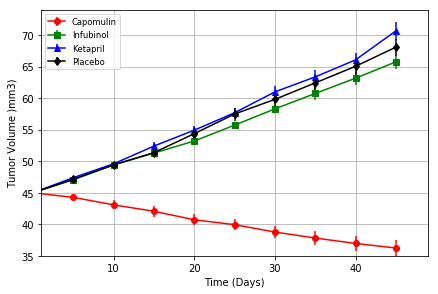

In [5]:
plt.xlim(1,49)
plt.ylim(35,74)

# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Capomulin'],yerr=tumor_vol_sem_pvt_df['Capomulin'],color='r',
             marker='o')
plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Infubinol'],yerr=tumor_vol_sem_pvt_df['Infubinol'],color='g',
            marker='s')
plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Ketapril'],yerr=tumor_vol_sem_pvt_df['Ketapril'],color='b',
            marker='^')
plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Placebo'],yerr=tumor_vol_sem_pvt_df['Placebo'],color='k',
            marker='d')

plt.tight_layout()
plt.title=('Tumor Response to Treatment')
plt.ylabel('Tumor Volume )mm3)')
plt.xlabel('Time (Days)')
plt.grid()
plt.legend(loc='best',fontsize='small')

# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Naftisol'],yerr=tumor_vol_sem_pvt_df['Naftisol'],color='y')

# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Propriva'],yerr=tumor_vol_sem_pvt_df['Propriva'],color='b')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Ramicane'],yerr=tumor_vol_sem_pvt_df['Ramicane'],color='c')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Stelasyn'],yerr=tumor_vol_sem_pvt_df['Stelasyn'],color='r')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Zoniferol'],yerr=tumor_vol_sem_pvt_df['Zoniferol'],color='r')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Ketapril'],yerr=tumor_vol_sem_pvt_df['Ketapril'],color='k',
#             marker='d')

# Save the Figure
plt.savefig("Images/Tumor_Response_to_Treatment.png")




## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

meta_mean_df = data_combine.groupby(['Drug','Timepoint'],as_index=False)['Metastatic Sites'].mean()
# Convert to DataFrame

# Preview DataFrame
meta_mean_df.head(5)


# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem_df = data_combine.groupby(['Drug','Timepoint']).sem()['Metastatic Sites'].reset_index()
# Convert to DataFrame

# Preview DataFrame
meta_sem_df.head()


# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_pvt_df =  meta_mean_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
meta_sem_pvt_df = meta_sem_df.pivot(index='Timepoint', columns='Drug')['Metastatic Sites']
# Preview that Reformatting worked
meta_mean_pvt_df.head(5)

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [9]:
meta_sem_pvt_df.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


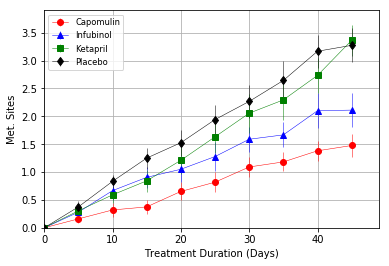

In [10]:
# Generate the Plot (with Error Bars)
plt.xlim(0,49)
plt.ylim(0.0,3.9)

# Generate the Plot (with Error Bars)
plt.errorbar(meta_mean_pvt_df.index,meta_mean_pvt_df['Capomulin'],yerr=meta_sem_pvt_df['Capomulin'],color='r',
             marker='o',linewidth=.5)
plt.errorbar(meta_mean_pvt_df.index,meta_mean_pvt_df['Infubinol'],yerr=meta_sem_pvt_df['Infubinol'],color='b',
            marker='^',linewidth=.5)
plt.errorbar(meta_mean_pvt_df.index,meta_mean_pvt_df['Ketapril'],yerr=meta_sem_pvt_df['Ketapril'],color='g',
            marker='s',linewidth=.5)
plt.errorbar(meta_mean_pvt_df.index,meta_mean_pvt_df['Placebo'],yerr=meta_sem_pvt_df['Placebo'],color='k',
            marker='d',linewidth=.5)


plt.title=('Metastatic Spread During Treatment')
plt.ylabel('Met. Sites')
plt.xlabel('Treatment Duration (Days)')
plt.grid()
plt.legend(loc='best',fontsize='small')

# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Naftisol'],yerr=tumor_vol_sem_pvt_df['Naftisol'],color='y')

# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Propriva'],yerr=tumor_vol_sem_pvt_df['Propriva'],color='b')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Ramicane'],yerr=tumor_vol_sem_pvt_df['Ramicane'],color='c')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Stelasyn'],yerr=tumor_vol_sem_pvt_df['Stelasyn'],color='r')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Zoniferol'],yerr=tumor_vol_sem_pvt_df['Zoniferol'],color='r')
# plt.errorbar(tumor_vol_mean_pvt_df.index,tumor_vol_mean_pvt_df['Ketapril'],yerr=tumor_vol_sem_pvt_df['Ketapril'],color='k',
#             marker='d')

# Save the Figure
plt.savefig("Images/Metastatic Spread During Treatment.png")




# Save the Figure

# Show the Figure


## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_cnt_df = data_combine.groupby(['Drug','Timepoint']).nunique()['Mouse ID'].reset_index()
# Convert to DataFrame
mice_cnt_df.head()
# Preview DataFrame
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [42]:
drugs = mice_cnt_df['Drug'].unique().tolist()
drugs

# for x in mice_cnt_df:
#     print(mice_cnt_df['Drug'].unique().tolist())
    

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [23]:
drug = drugs.loc[[0]]

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [62]:
Timepoint_n = 5

for Timepoint_n in range(0, 46, 5):
    drug = mice_cnt_pvt_df.loc[[45]] - mice_cnt_pvt_df.loc[[Timepoint_n]]
drug

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
45,0,0,0,0,0,0,0,0,0,0


In [45]:
# Minor Data Munging to Re-Format the Data Frames
# Minor Data Munging to Re-Format the Data Frames
mice_cnt_pvt_df =  mice_cnt_df.pivot(index='Timepoint', columns='Drug')['Mouse ID']

# Preview that Reformatting worked
mice_cnt_pvt_df

# Preview that Reformatting worked

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [14]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [15]:
data = pd.Series(mice_cnt_df[])

SyntaxError: invalid syntax (<ipython-input-15-008b2a77a604>, line 1)

KeyError: 'Capomulin'

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff

In [ ]:
mice_cnt_df


## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()